In [246]:
# yahoo_finance is used to fetch data
!pip install yfinance

In [247]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [248]:
# Linear Regression

In [249]:


# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol,start,end)
# dataset = pd.read_csv("./dataset/AAPL.csv")

[*********************100%***********************]  1 of 1 completed


In [250]:
# View Columns
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888062,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070827,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200


In [251]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600,0.052201,0.015062,0,1,1,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070827,89738400,0.047854,0.008078,1,1,1,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,0.042010,0.013406,0,1,0,0.011386
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,0.050550,0.009659,1,1,0,-0.003714
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.379406,86336000,0.051747,0.009515,1,0,0,-0.000115


In [252]:
# view dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600,0.052201,0.015062,0,1,1,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070827,89738400,0.047854,0.008078,1,1,1,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538441,94640000,0.042010,0.013406,0,1,0,0.011386
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384155,82271200,0.050550,0.009659,1,1,0,-0.003714
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.379406,86336000,0.051747,0.009515,1,0,0,-0.000115
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,-0.005645,0.021444,1,1,0,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,0.011784,0.020898,1,0,0,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,0.029476,0.040995,0,0,1,-0.030685


In [253]:
# view how many null values in each column
dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

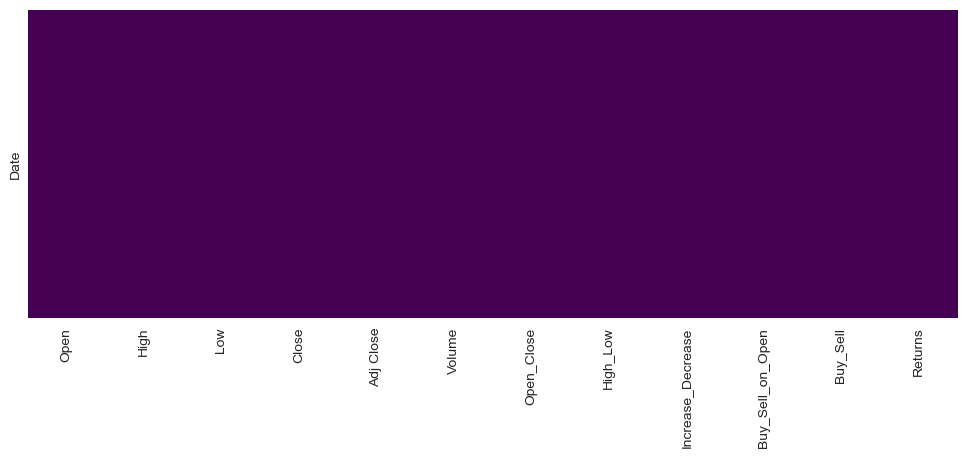

In [254]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

In [255]:
# view number of rows, number of columns
dataset.shape

(1258, 12)

In [256]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  15096


In [257]:
# view columns names
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open_Close',
       'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell',
       'Returns'],
      dtype='object')

In [258]:
# view data types of the columns
dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Open_Close           float64
High_Low             float64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
dtype: object

In [259]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-03 to 2022-12-30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1258 non-null   float64
 1   High               1258 non-null   float64
 2   Low                1258 non-null   float64
 3   Close              1258 non-null   float64
 4   Adj Close          1258 non-null   float64
 5   Volume             1258 non-null   int64  
 6   Open_Close         1258 non-null   float64
 7   High_Low           1258 non-null   float64
 8   Increase_Decrease  1258 non-null   int32  
 9   Buy_Sell_on_Open   1258 non-null   int32  
 10  Buy_Sell           1258 non-null   int32  
 11  Returns            1258 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 113.0 KB


In [260]:
# view the statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,98.072611,99.262433,96.924873,98.136639,96.712369,1.168922e+08,0.019652,0.023376,0.473768,0.545310,0.527822,0.001141
std,46.294417,46.886649,45.680389,46.302281,46.596406,5.506495e+07,0.020981,0.013311,0.499510,0.498141,0.499424,0.021094
min,35.994999,36.430000,35.500000,35.547501,34.257278,3.519590e+07,-0.060166,0.004924,0.000000,0.000000,0.000000,-0.128647
25%,51.003125,51.468124,50.586249,51.044375,49.446951,8.012802e+07,0.005515,0.014252,0.000000,0.000000,0.000000,-0.009110
50%,91.621250,93.032501,90.943752,92.123749,90.572357,1.023249e+08,0.019222,0.019975,0.000000,1.000000,1.000000,0.001049
75%,142.765003,144.487499,141.022495,142.882496,141.953880,1.372278e+08,0.034144,0.028733,1.000000,1.000000,1.000000,0.012366
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08,0.090658,0.115520,1.000000,1.000000,1.000000,0.119808


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

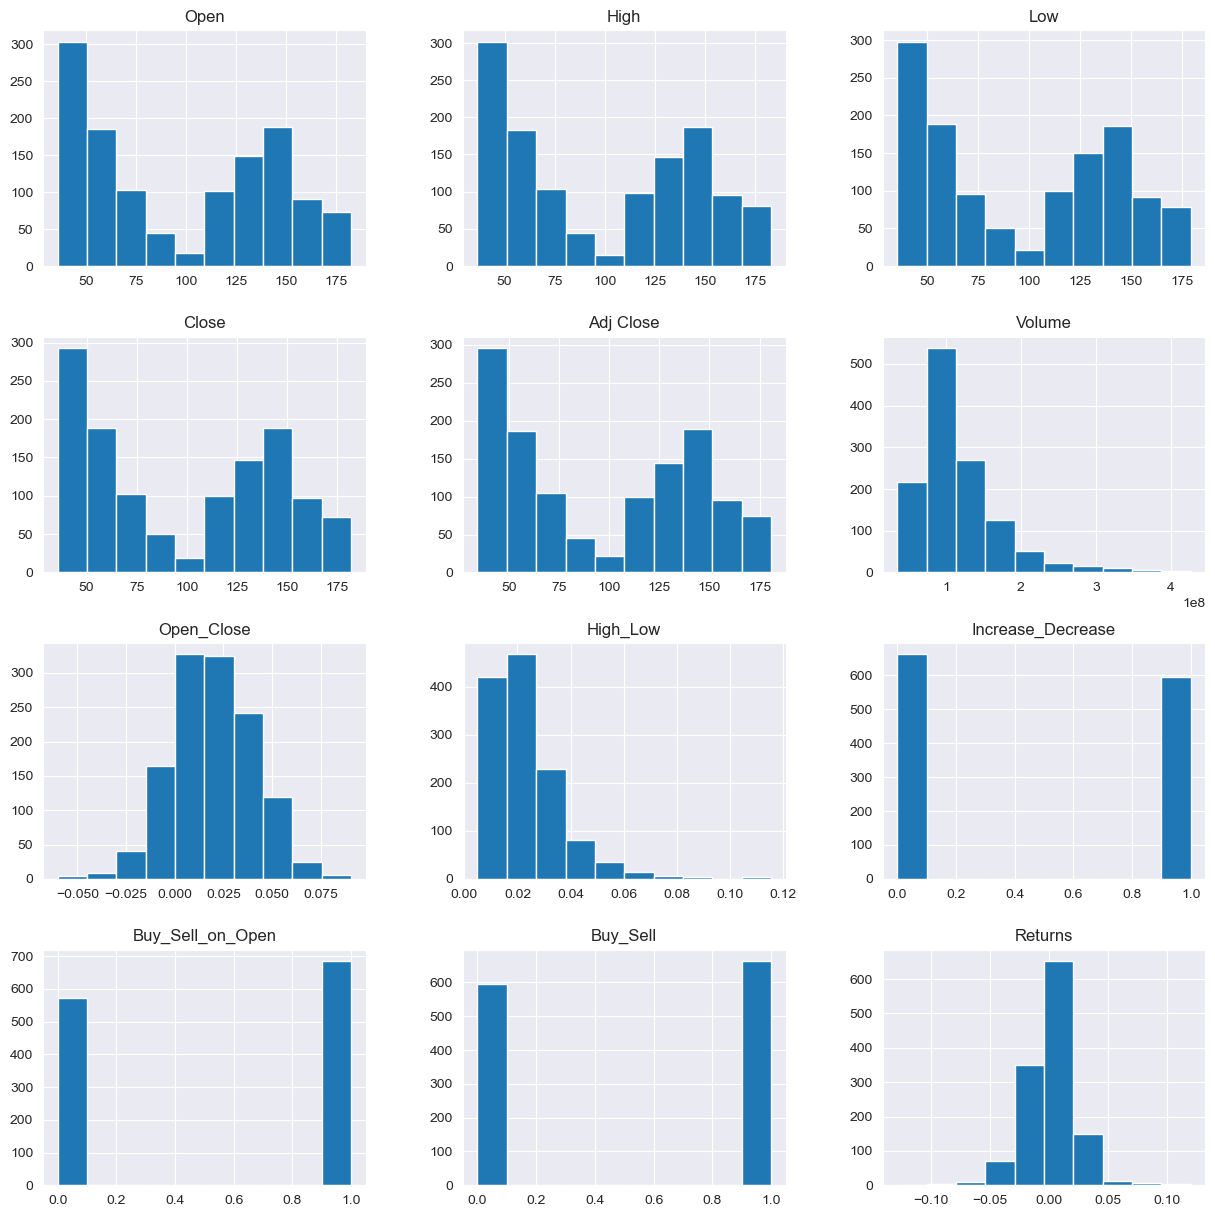

In [261]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

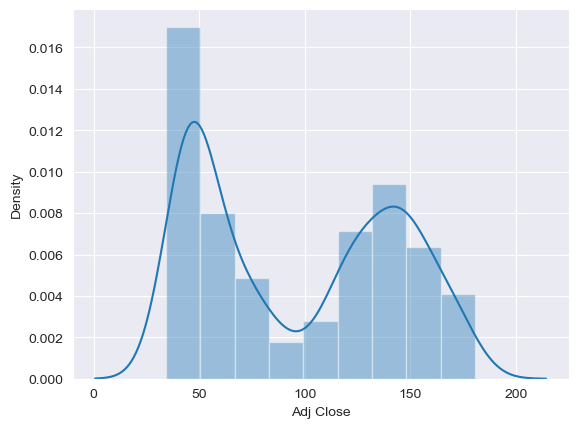

In [262]:
sns.distplot(dataset['Adj Close'])

<AxesSubplot:>

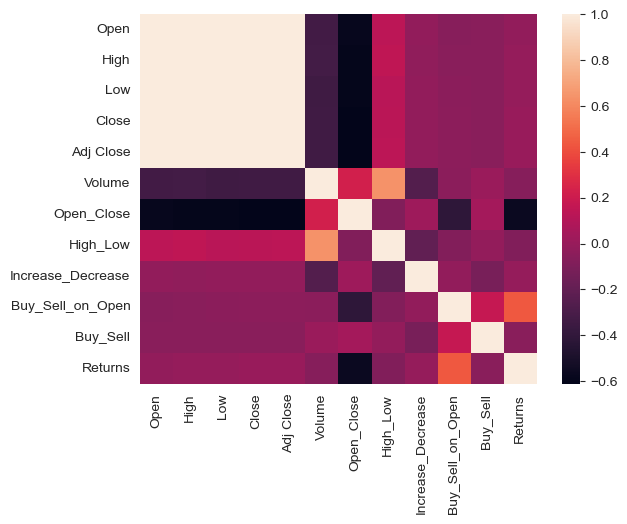

In [263]:
sns.heatmap(dataset.corr())

In [264]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [266]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [267]:
print(lm.intercept_)

0.3727676343021784


In [268]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
Open,9.769935e-02
High,4.439358e-01
Low,4.506782e-01
Volume,-1.335702e-09
Open_Close,-5.046407e+01
High_Low,6.290129e+00
Returns,7.520329e+00


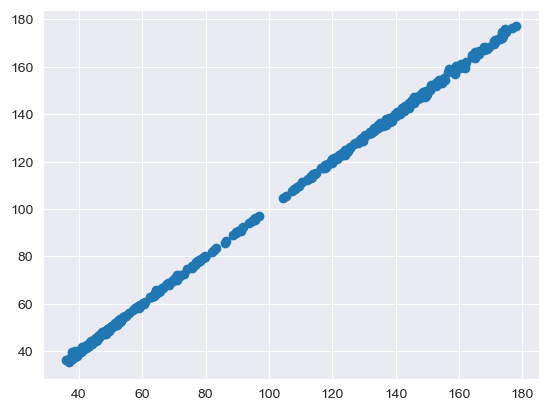

In [269]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [270]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head())
print(df.tail())

                Actual   Predicted
Date                              
2018-08-24   51.897499   51.849786
2021-09-20  141.691757  141.482443
2018-06-20   44.619995   44.467800
2018-02-20   40.957062   40.715044
2020-05-19   76.966660   77.468537
                Actual   Predicted
Date                              
2019-07-23   50.725388   50.669589
2019-05-06   50.443684   50.722924
2019-07-03   49.649380   49.757904
2020-09-18  105.230171  105.493658
2018-10-01   54.562477   54.767531


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

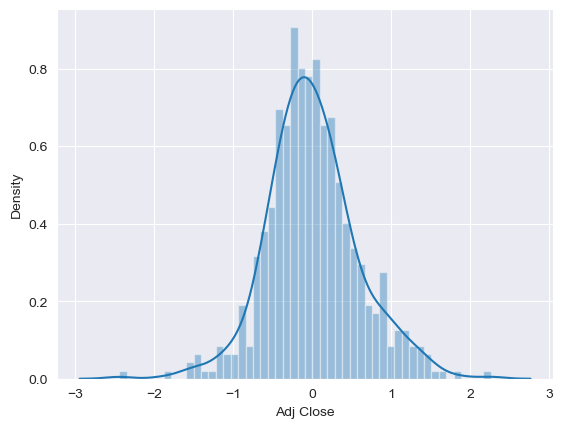

In [271]:
sns.distplot((y_test-y_pred),bins=50)

In [272]:
print(y_test.shape)
print(y_pred.shape)

(504,)
(504,)


In [273]:
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.9998005845883441
Score without cv: 0.9998119808760952


In [274]:
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.4361341567176464
Mean_Squared_Error(MSE): 0.33463829480942814
Root_Mean_Squared_Error(RMSE): 0.5784792950568137


In [275]:
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9998438
